### Classification (Decision Trees)
<hr>

#### Question 1

#### This problem involves the OJ data set which is part of the ISLR package and also available at Blakboard.

#### a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [1]:
library(ISLR)
library(tree)
head(OJ)

Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
CH,230,7,1.69,1.99,0.00,0.0,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0


In [2]:
set.seed(2)
train <- sample(1:nrow(OJ), 800)
str(train)

 int [1:800] 198 751 613 180 1007 1005 138 886 498 584 ...


In [3]:
training_set <- OJ[train,]
head(training_set)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
198,CH,275,7,1.99,2.13,0,0.54,1,0,0.999896,1.59,1.99,-0.40,Yes,0.253521,0,0.14,0
751,CH,229,7,1.69,1.69,0,0.20,0,1,0.680000,1.49,1.69,-0.20,Yes,0.118343,0,0.00,0
613,CH,259,7,1.86,2.18,0,0.00,0,0,0.363840,2.18,1.86,0.32,Yes,0.000000,0,0.32,0
180,CH,246,4,1.99,2.23,0,0.00,0,0,0.994235,2.23,1.99,0.24,No,0.000000,0,0.24,4
1007,CH,272,3,1.99,2.09,0,0.40,0,0,0.067109,1.69,1.99,-0.30,No,0.191388,0,0.10,3
1005,MM,238,3,1.79,2.09,0,0.00,0,0,0.104858,2.09,1.79,0.30,No,0.000000,0,0.30,3


In [4]:
test_set <- OJ[-train,]
nrow(test_set)

[1] 270

In [5]:
head(test_set)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
4,MM,227,1,1.69,1.69,0,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0,0.00,1
5,CH,228,7,1.69,1.69,0,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0,0.00,0
6,CH,230,7,1.69,1.99,0,0.0,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0,0.30,0
7,CH,232,7,1.69,1.99,0,0.4,1,1,0.972182,1.59,1.69,-0.10,Yes,0.201005,0,0.30,0
19,MM,269,2,1.86,2.18,0,0.0,0,0,0.320000,2.18,1.86,0.32,No,0.000000,0,0.32,2
23,CH,259,7,1.86,2.18,0,0.0,0,0,0.744000,2.18,1.86,0.32,Yes,0.000000,0,0.32,0


#### b) Fit a tree to the training data, with Purchase as the response and the other variables as predictors. Use the summary() function to produce summary statistics about the tree, and describe the results obtained. What is the training error rate? How many terminal nodes does the tree have?


In [6]:
purchase_tree <- tree(Purchase~.,data=OJ,subset=train)
summary(purchase_tree)


Classification tree:
tree(formula = Purchase ~ ., data = OJ, subset = train)
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "ListPriceDiff" "PctDiscMM"    
Number of terminal nodes:  8 
Residual mean deviance:  0.7659 = 606.6 / 792 
Misclassification error rate: 0.1675 = 134 / 800 

#### Answer:
The classification tree uses 4 variables - LoyalCH, PriceDiff, ListPriceDiff, PctDiscMM <br>
Training error rate = 0.1675 (16.75%) <br>
Terminal nodes = 8 <br>

#### c) Create a plot of the tree, and interpret the results.

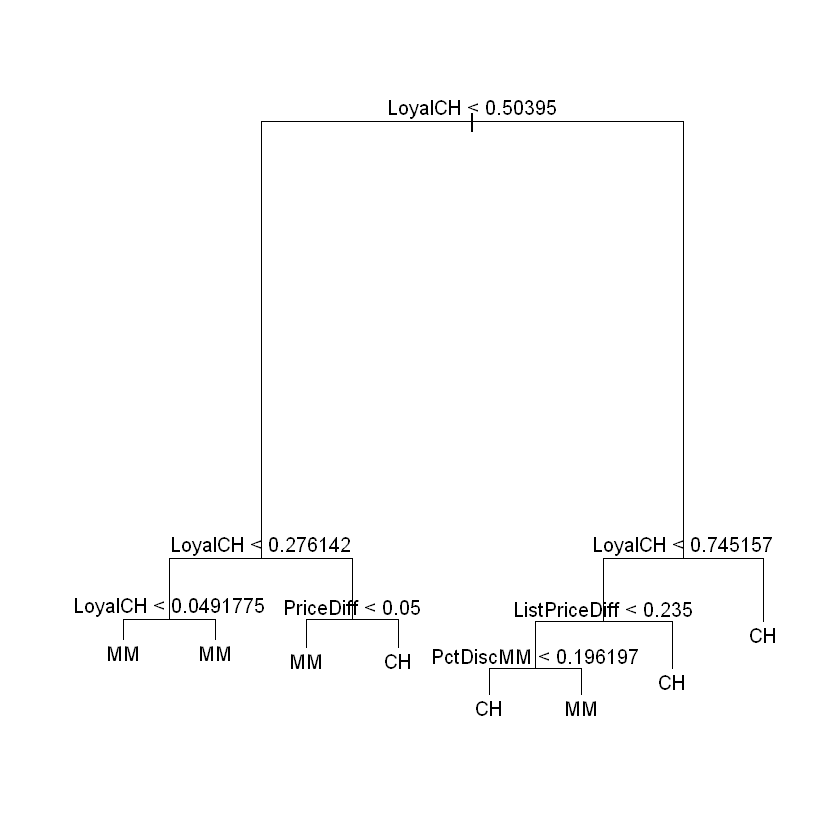

In [7]:
plot(purchase_tree)
text(purchase_tree, pretty=0)

#### Answer:
To interpret decision trees, one must follow a series of decisions to arrive at answer. 
For example, if I have a new observation, then I need to make decisions from the top to bottom to understand if a customer will buy Citrus Hill or Minute Maid Orange Juice.
For example, if the customer is a crazy Citrus Hill fan (LoyalCH > 0.7451), they are more likely to purchase Citrus Hill orange juice. However if customer is moderate Citrus Hill fan (say, LoyalCH = 0.6) and list price difference between the two brands is less (ListPriceDiff < 0.235) and percent discount for Minute Maid is high (PctDiscMM > 0.1961), the customer is more likely to buy Minute Maid.

#### d) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

In [8]:
tree_pred <- predict(purchase_tree, test_set, type="class")
error_rate <- 1 - mean(tree_pred == test_set$Purchase)
error_rate

[1] 0.1481481

In [9]:
confusion_matrix <- table(tree_pred, test_set$Purchase)
confusion_matrix

         
tree_pred  CH  MM
       CH 161  28
       MM  12  69

In [10]:
error_rate_from_confusion_matrix = (confusion_matrix['CH','MM'] + confusion_matrix['MM','CH'])/ nrow(test_set) 
error_rate_from_confusion_matrix
error_rate == error_rate_from_confusion_matrix

[1] 0.1481481

[1] TRUE

#### Answer:
Test error rate = 0.1481 (14.81%)

#### e) Create a pruned tree with four terminal nodes. 

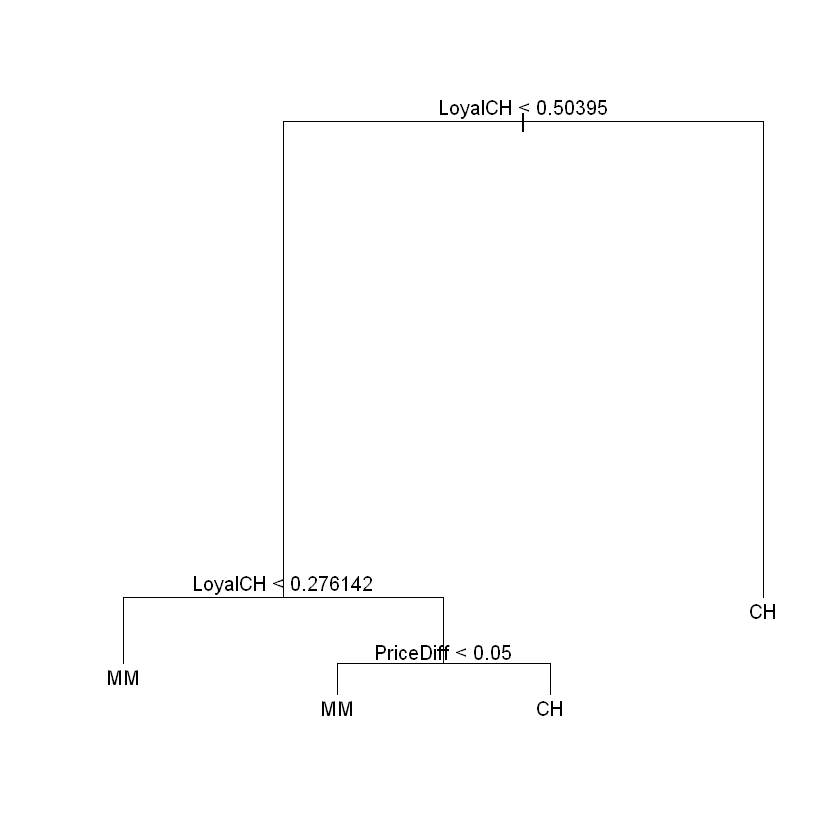

In [11]:
pruned_tree <- prune.misclass(purchase_tree, best=4)
plot(pruned_tree)
text(pruned_tree, pretty=0)

#### f) Compare the test error rates between the pruned and unpruned trees. Which is higher?

In [12]:
pruned_predict <- predict(pruned_tree, test_set, type="class")
table(pruned_predict, test_set$Purchase)
pruned_error_rate <- 1 - mean(pruned_predict == test_set$Purchase)
pruned_error_rate

              
pruned_predict  CH  MM
            CH 162  31
            MM  11  66

[1] 0.1555556

#### Answer:
The test error rate of the pruned tree is higher at 15.56%, as compared to the unpruned tree's error rate of 14.81%.
To further verify, if pruning actually produces worse results, we plot the deviance against the tree size after cross validation. 

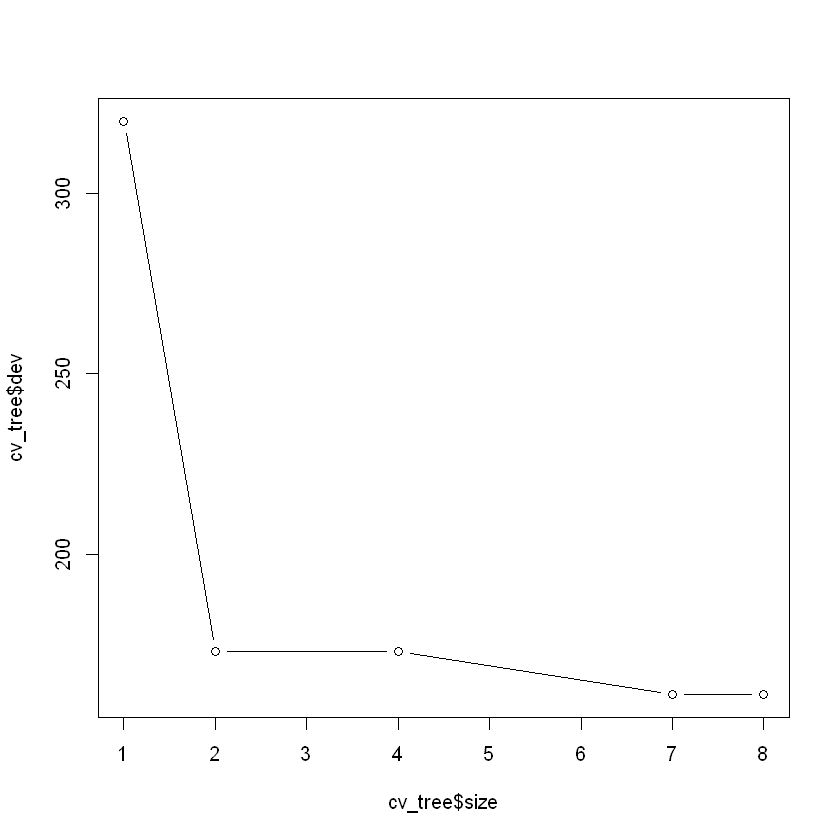

In [13]:
set.seed(5)
cv_tree <- cv.tree(purchase_tree, FUN=prune.misclass)
plot(cv_tree$size, cv_tree$dev, type = "b")

This shows that the deviance for tree size of 4 is actually higher than for tree size of 8. Therefore, it makes sense that the error rate for tree size of 4 is higher.